# Project 3: Uganda (fancier title?)

#### Team Jevons: Saraya Danielsen, Anoushka Gupta, Adrianna Ngo, Renee Lin, Yinan Xia, Aidan Gauper

*Describe project goals and main ideas here*

In [1]:
!pip install CFEDemands --upgrade
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install gnupg
#!pip install dvc

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing ./.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl


In [2]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

# [A]: Choice of Population, with supporting Expenditure Data

* Uganda
* Focusing on Female 14-30 demographic

#### Reading in Google Sheets:

In [3]:
InputFiles = {'Expenditures':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','Expenditures'),
              'Consumption':('1RT5AfbZbWx-CmNaOHLp7aD9qEjgjiBv8lZmPexuKEWg','Consumption'),
              'HH Characteristics':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','HH Characteristics')}
              
    #,'FCT':('1TM7FpKURXFAuXW4dLpGt98QA2CH4WTDty-4nPOUv1Mg','05 NV_sum_57 (per 100g EP)')}

#### Function for reading in sheets:

In [4]:
def get_clean_sheet(key,sheet=None):
    dfs = read_sheets(key)
    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0] 
    df.columns = [c.strip() for c in df.columns.tolist()]
    df = df.loc[:,~df.columns.duplicated(keep='first')]   
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)
    df = df.loc[~df.index.duplicated(), :]
    return df

## Expenditures Table

In [5]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Matooke(cluster),Matooke(others),avocado,beans dry,beans fresh,beef,beer,bread,cabbages,carrots,...,simsim,soda,sorghum,sugar,sweet bananas,sweet potatoes dry,sweet potatoes fresh,tea,tomatoes,watermelon
j,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2005,1,NaN,NaN,NaN,NaN,NaN,6000.0,2400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4500.0,NaN,NaN,NaN,50.0,700.0,NaN
1013000202,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000204,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000206,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000209,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,25600.0,NaN,NaN,NaN,...,NaN,5000.0,NaN,2000.0,NaN,NaN,5000.0,100.0,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,NaN,NaN,NaN,NaN,8000.0,7500.0,NaN,14000.0,NaN,NaN,...,NaN,2000.0,NaN,1700.0,NaN,NaN,1000.0,300.0,1400.0,NaN
3010730016100203,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,400.0,...,NaN,NaN,NaN,900.0,NaN,NaN,NaN,100.0,1000.0,NaN
3010830020020503,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,800.0,NaN,...,NaN,NaN,NaN,2400.0,NaN,NaN,NaN,300.0,500.0,NaN


#### Taking log of expenditure table (x); log table (y) will be used for later estimation:

In [6]:
y = np.log(x)

## Household Characteristics Table

In [36]:
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
1013000201,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000202,2005,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000204,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000206,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000209,2005,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3010730016100203,2011,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3010830020020503,2011,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0


## Consumption Quantities Table

In [8]:
q = get_clean_sheet(InputFiles['Consumption'][0],
                    sheet=InputFiles['Consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                                            Matooke(cluster)  \
j            t    m u                                           
1.013000e+09 2005 1 Bottle (300 ml)                       NaN   
                    Bottle (500 ml)                       NaN   
                    Fish - Whole (1   2 kg)               NaN   
                    Kilogram (kg)                         NaN   
                    Litre                                 NaN   
...                                                       ...   
3.020000e+16 2011 1 Kilogram (kg)                         NaN   
                    Litre                                 NaN   
                    Packet (100 g)                        NaN   
                    Piece-Big                             NaN   
                    Piece-Small                           NaN   

i                                            Matooke(others)  avocado  \
j            t    m u                                                   
1.013000e+09 2005 1 Bottle (300 ml)                      NaN      NaN   
                    Bottle (500 ml)                      NaN      NaN   
                    Fish - Whole (1   2 kg)              NaN      NaN   
                    Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
...                                                      ...      ...   
3.020000e+16 2011 1 Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
                    Packet (100 g)                       NaN      NaN   
                    Piece-Big                            NaN      NaN   
                    Piece-Small                          NaN      NaN   

i                                            beans dry  beans fresh  beef  \
j            t    m u                                                       
1.013000e+09 2005 1 Bottle (300 ml)                NaN          NaN   NaN   
                    Bottle (500 ml)                NaN          NaN   NaN   
                    Fish - Whole (1   2 kg)        NaN          NaN   NaN   
                    Kilogram (kg)                  NaN          NaN   2.0   
                    Litre                          NaN          NaN   NaN   
...                                                ...          ...   ...   
3.020000e+16 2011 1 Kilogram (kg)                  NaN          NaN   NaN   
                    Litre                          NaN          NaN   NaN   
                    Packet (100 g)                 NaN          NaN   NaN   
                    Piece-Big                      NaN          NaN   NaN   
                    Piece-Small                    NaN          NaN   NaN   

i                                            beer  bread  cabbages  carrots  \
j            t    m u                                                         
1.013000e+09 2005 1 Bottle (300 ml)           NaN    NaN       NaN      NaN   
                    Bottle (500 ml)           2.0    NaN       NaN      NaN   
                    Fish - Whole (1   2 kg)   NaN    NaN       NaN      NaN   
                    Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
...                                           ...    ...       ...      ...   
3.020000e+16 2011 1 Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
                    Packet (100 g)            NaN    NaN       NaN      NaN   
                    Piece-Big                 NaN    NaN       NaN      NaN   
                    Piece-Small               NaN    NaN       NaN      NaN   

i                                            ...  simsim  soda  sorghum  \
j            t    m u                        ...                          
1.013000e+09 2005 1 Bott

# [B]: Nutritional content of foods

## Food Conversion Table

* Anoushka add in here

In [9]:
#fct = get_clean_sheet(InputFiles['FCT'][0],
                    # sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
# fct = fct.loc[fct.Code.str.len()==6]
# fct = fct.set_index('Code')
# fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################

# fct.index.name = 'i'

# fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# fct

# [B]: Estimate Demand System

### Our Population
Filtering to get households with women in our demographic: 15-30 (so we'll use the age brackets "F 14-18" and "F 19-30")

#### (Saraya's note: lol this entire area is a mess as I stumbled towards finding what I wanted to find, once it's all set I will make it better)

In [49]:
# Make a column for filtering; it'll be 0 if there's no Female 14-30 year olds, 
# and 1 or greater if there are (it's just a total of this demographic per household)

young_female = z
young_female['F 14-30?'] = young_female["F 14-18"] + young_female["F 19-30"]

In [51]:
filter1 = young_female["F 14-30?"]!=0

j                  t     m
1013000201         2005  1    False
1013000202         2005  1    False
1013000204         2005  1    False
1013000206         2005  1    False
1013000209         2005  1    False
                              ...  
3010730012030203   2011  1     True
3010730016100203   2011  1     True
3010830020020503   2011  1     True
3030230010040204   2011  1     True
30211230006050302  2011  1     True
Name: F 14-30?, Length: 11662, dtype: bool

In [52]:
# Here are households that have at least 1 person F 14-30:
young_homes = young_female[filter1]

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,F 14-30?
j,t,m,,,,,,,,,,,,,,,
1013000210,2005,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1013000211,2005,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1013000212,2005,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
1013000213,2005,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1021000102,2005,1,0,0,0,0,0,1,0,0,1,0,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
3010730016100203,2011,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3010830020020503,2011,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1


### Filtering further to find households that are LIKELY* family households with young mothers under 30
* Uganda average female age at first marriage: 18.2 years ([source](http://www.quandl.com/demography/age-at-first-marriage-female-all-countries))
* Mother's mean age at first birth: 19.4 years ([source](https://www.cia.gov/the-world-factbook/))

#### *Key word likely; if anything, 'young_mothers' can be our roughly accurate sample that probably captures a lot of young-mother homes, even if some non-young-mother homes might slip through the cracks, it's still a better sample of our population than if we just used the original dataframe of all households

In [54]:
# Filtering the homes with young women further, to find ones with probable young mothers

# Do this by looking for the ones with children? Within the 0-8 range?
# Maybe not having an older adult in the house? But what if their parents live with them?
# Okay this might not be a perfect; ask team which filters to keep


# Add more filtering columns for combined child and older adult values (combining Male & Female for each)
# THIS IS NOT THE BEST IMPLEMENTATOION, later on make it all smoother~
added_demographics = young_homes
added_demographics['Adult 51+?'] = young_homes["F 51+"] + young_homes["M 51+"]
added_demographics['Child 0-8?'] = young_homes['M 0-3'] + young_homes['F 0-3'] + young_homes['M 4-8'] + young_homes['F 4-8']


# Remember to fix this error message later and not use copies of df, but for now I need to make sure I can get the rows I need


/tmp/ipykernel_24/3777888488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added_demographics['Child 0-3?'] = young_homes["F 0-3"] + young_homes["M 0-3"]
/tmp/ipykernel_24/3777888488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added_demographics['Child 4-8?'] = young_homes["F 4-8"] + young_homes["M 4-8"]
/tmp/ipykernel_24/3777888488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [69]:
# once you clean up this^ later, you can delete this part:
clean = added_demographics.drop(['Child 0-3?', 'Child 4-8?', 'Child 9-13?', 'Child 0-13?'], axis=1)

In [71]:
# Older adult filter
filter2 = clean["Adult 51+?"]==0

In [72]:
# Children filter
filter3 = clean["Child 0-8?"]>=1

In [75]:
# Put all filters together
young_mothers = clean[filter2 & filter3]

In [81]:
# We don't need the columns that we filtered to be 0, that's a given that there are no 51+ anywhere now:
young_mothers = young_mothers.drop(['M 51+', 'F 51+', 'Adult 51+?'], axis=1)

In [86]:
# Clean this later
young_mothers = young_mothers.drop(['F 14-30?', 'Child 0-8?'], axis=1)

## Estimation 1: Demand

In [100]:
# Get the unaltered original national population df back, so it can be used for comparison
# And get rid of this in cleaning too

original_df = z.drop('F 14-30?', axis=1)

In [102]:
# Create reduced form
import cfe


# Change what we use for z (appropriate households for our population) here depending on what group thinks is best;
# If my estimation for young mothers ('young_mothers') doesn't seem accurate, 
# just use the broader 'young_homes' dataframe

# If anything, 'young_mothers' can be a roughly accurate sample that probably captures a lot of young mother homes,
# even if some non-young-mother homes might slip through the cracks, it's still a better sample of our population
# than if we just used the original dataframe of all houses


# Create reduced form for population AND original population, to see how rates of demand differ
result_young_mom = cfe.Result(y=y,z=young_mothers)

result_national_avg = cfe.Result(y=y,z=original_df)

In [103]:
result_young_mom

<xarray.Result>
Dimensions:           (k: 12, j: 3096, t: 4, m: 1, i: 37)
Coordinates:
  * j                 (j) int64 1013000201 1013000202 ... 3010830020020503
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * i                 (i) <U34 'beans dry' 'beans fresh' ... 'tea' 'tomatoes'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 19-30' 'F 31-50'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 nan 0.0 0.0 0.0 ... nan nan nan 1.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan 6.215
    logp              object None
    z                 (k, j, t, m) float64 nan 0.0 0.0 0.0 ... nan nan nan 1.0
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [104]:
result_national_avg

<xarray.Result>
Dimensions:           (k: 14, j: 3737, t: 4, m: 1, i: 37)
Coordinates:
  * j                 (j) int64 1013000201 1013000202 ... 30211230006050302
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * i                 (i) <U34 'beans dry' 'beans fresh' ... 'tea' 'tomatoes'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [105]:
# run this to be able to run the next few lines:

result_young_mom.get_reduced_form()
result_national_avg.get_reduced_form()

### Coefficients for each age/sex bracket and food item:

Example understanding for the first entry (M 0-3 and 'beans dry'): 
* Holding household size constant, for every boy under the age of 3, there is a 1.5% increase in household expenditures on dry beans (on average)


#### (Coefficients for our targeted population:)

In [106]:
result_young_mom.delta.to_dataframe().unstack('k')

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                           0.015757  0.139600  0.075922  0.090800   
beans fresh                         0.049824  0.146983 -0.069587  0.073766   
beef                                0.024958  0.062790  0.064629  0.075157   
bread                               0.030745  0.023793  0.020165  0.039893   
cabbages                            0.014001  0.023903  0.015094  0.020860   
cassava dry/flour                   0.253291  0.148916  0.164138  0.073120   
cassava fresh                      -0.001225  0.053928  0.098791  0.006511   
chicken                             0.017953 -0.043749 -0.050234  0.073493   
coffee                              0.048016  0.014890 -0.002072 -0.105707   
cooking oil                        -0.066629  0.008553  0.021791  0.024495   
dodo                               -0.034641 -0.058472  0.042826  0.163013   
dry/smoked fish                    -0.050326  0.075912  0.102482  0.085322   
eggs                               -0.119687  0.127190  0.004052 -0.217913   
expenditure in restaurants on food -0.011269  0.052327  0.103516  0.022348   
fresh fish                          0.060469  0.113842  0.036437  0.059469   
fresh milk                          0.024386 -0.000096 -0.034651 -0.049001   
goat meat                          -0.010133  0.142600  0.015765  0.086800   
ground nuts pounded                 0.020257  0.052165 -0.025370  0.060041   
irish potatoes                      0.188339  0.103330  0.067366  0.092167   
maize cobs                         -0.133247  0.037501 -0.085654  0.019861   
maize flour                         0.047617  0.168718  0.105394  0.099622   
mangoes                             0.070873 -0.082518  0.064602 -0.111099   
margarine,butter                   -0.012401 -0.025105 -0.193046 -0.047905   
matooke_1                          -0.027258  0.160943  0.029658 -0.037387   
millet                              0.001433  0.095120  0.028718  0.197348   
onions                             -0.074435 -0.041274  0.051453  0.018272   
oranges                             0.011829  0.084894  0.068052 -0.042113   
other vegetables                    0.008524 -0.033470  0.112509  0.072096   
passion fruits                     -0.051561 -0.099554  0.025929 -0.173750   
rice                                0.083558  0.101132  0.090856  0.135009   
salt                                0.073255  0.072366  0.069235  0.078391   
soda                                0.000735 -0.058553 -0.007497 -0.051470   
sugar                               0.022451  0.074977  0.034856  0.081900   
sweet bananas                       0.044962  0.020708 -0.029366 -0.069437   
sweet potatoes fresh                0.100768  0.152431  0.176159  0.100882   
tea                                 0.011551 -0.013804  0.023903  0.023071   
tomatoes                           -0.039469 -0.017188  0.026440  0.053702   

                                                                            \
k                                    M 19-30   M 31-50     F 0-3     F 4-8   
i                                                                            
beans dry                           0.061861  0.158583  0.088653  0.119205   
beans fresh                         0.092149  0.346317  0.065589  0.067815   
beef                                0.155031  0.182470  0.010927  0.037086   
bread                               0.062393  0.256169  0.066230  0.061051   
cabbages                            0.046661  0.093757  0.020530  0.015060   
cassava dry/flour                   0.080805  0.109823  0.015815  0.060258   
cassava fresh                       0.052743  0.126042  0.041781  0.093152   
chicken                             0.103590  0.092538 -0.006977 -0.018914   
coffee                              0.067351  0.167572  0.00

#### (Coefficients for total national population:)

In [107]:
result_national_avg.delta.to_dataframe().unstack('k')

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                          -0.020105  0.091101  0.069991  0.131634   
beans fresh                         0.003502  0.138232  0.049423  0.043303   
beef                                0.012622  0.025357  0.076339  0.081080   
bread                              -0.010931 -0.010405  0.039982  0.015581   
cabbages                            0.014337 -0.007694  0.035684  0.098675   
cassava dry/flour                   0.240597  0.163090  0.237445  0.090692   
cassava fresh                      -0.003535  0.006866  0.158522  0.094510   
chicken                             0.005440 -0.043764  0.015580  0.035094   
coffee                              0.022706 -0.057133  0.028877  0.008619   
cooking oil                        -0.029436 -0.006941  0.021453  0.052854   
dodo                               -0.064294  0.010363  0.145474  0.102694   
dry/smoked fish                    -0.037726  0.043358  0.094554  0.125807   
eggs                               -0.071013  0.041225  0.006218  0.000555   
expenditure in restaurants on food -0.094559  0.037472  0.151278  0.025689   
fresh fish                          0.020568  0.080817  0.028284  0.073189   
fresh milk                         -0.001583 -0.002583 -0.014292 -0.023467   
goat meat                          -0.052198  0.101357  0.009729  0.055356   
ground nuts pounded                 0.033751  0.022292  0.009320  0.044031   
irish potatoes                      0.086792  0.069802  0.115015  0.128570   
maize cobs                         -0.064494 -0.044831  0.043807  0.182292   
maize flour                         0.009996  0.112082  0.142091  0.075552   
mangoes                            -0.012302  0.032207  0.053649 -0.052200   
margarine,butter                   -0.015707  0.022894 -0.081790 -0.020390   
matooke_1                          -0.017372  0.179616  0.051870  0.053682   
millet                              0.096938  0.067989  0.001464  0.142472   
onions                             -0.051036 -0.027855  0.030258  0.048141   
oranges                            -0.050278  0.097141  0.035387  0.028289   
other vegetables                    0.012330 -0.046587  0.078986  0.052800   
passion fruits                      0.007164 -0.067459  0.028914 -0.094513   
rice                                0.041959  0.089870  0.105172  0.099908   
salt                                0.072773  0.065634  0.082439  0.087910   
soda                               -0.011965 -0.063974  0.055411 -0.049988   
sugar                               0.012851  0.059009  0.045291  0.091241   
sweet bananas                       0.011865  0.005062  0.000327  0.025421   
sweet potatoes fresh                0.110313  0.127481  0.137242  0.100394   
tea                                -0.012445  0.016257  0.036033  0.041242   
tomatoes                           -0.040840 -0.022914  0.018166  0.050890   

                                                                            \
k                                    M 19-30   M 31-50     M 51+     F 0-3   
i                                                                            
beans dry                           0.092998  0.126748  0.192872  0.035235   
beans fresh                         0.140382  0.256491  0.353082  0.098333   
beef                                0.114490  0.197677  0.197012  0.004936   
bread                               0.133572  0.290906  0.142049  0.021215   
cabbages                            0.061728  0.060672  0.079951  0.038930   
cassava dry/flour                   0.106282  0.175328  0.190029  0.068200   
cassava fresh                       0.057267  0.043634  0.019687  0.003492   
chicken                             0.125162  0.132872  0.148593 -0.003726   
coffee                              0.098526  0.060754  0.42

#### AN INTERESTING COMPARISON TO MAKE: see if values are different between smaller 'young mom household' population vs. the national average

* So there are certainly differences; I don't know where to start. Any insights from anyone?

### Demand of each good by year:

* The bigger the number, the bigger the demand for that good, in that year
* Captures the effects of prices

In [108]:
result_young_mom.a.to_dataframe().unstack('i')

a                                                              \
i      beans dry beans fresh      beef     bread  cabbages cassava dry/flour   
t    m                                                                         
2005 1  6.480763    6.024852  7.495224  6.482331  5.987746          7.140608   
2009 1  6.994880    6.477517  8.010202  7.154964  6.274178          7.513323   
2010 1  7.217303    6.770307  8.068650  7.041059  6.331180          7.470712   
2011 1  7.266111    6.996644  8.329002  7.377432  6.586325          7.828418   

                                                                \
i      cassava fresh   chicken    coffee cooking oil      dodo   
t    m                                                           
2005 1      6.430530  8.239281  4.220566    6.225688  5.608971   
2009 1      6.926408  8.758069  4.518041    6.635138  6.177005   
2010 1      6.964894  9.033280  4.723277    6.754015  6.244705   
2011 1      7.390627  9.322449  4.818508    6.948155  6.513893   

                                                                     \
i      dry/smoked fish      eggs expenditure in restaurants on food   
t    m                                                                
2005 1        6.398891  6.392581                           8.136287   
2009 1        7.171785  6.790536                           8.639264   
2010 1        7.338310  7.060246                           9.031978   
2011 1        7.545150  7.273906                           9.224356   

                                                                           \
i      fresh fish fresh milk goat meat ground nuts pounded irish potatoes   
t    m                                                                      
2005 1   7.010879   6.953494  7.277190            6.252570       6.774229   
2009 1   7.491789   7.404079  7.738548            6.751892       6.947105   
2010 1   7.620862   7.332362  7.860507            6.882704       7.272947   
2011 1   8.011887   7.616134  8.385179            7.072225       7.379383   

                                                                              \
i      maize cobs maize flour   mangoes margarine,butter matooke_1    millet   
t    m                                                                         
2005 1   6.247313    6.644877  5.665335         6.696802  7.640860  6.286234   
2009 1   6.907133    7.094070  6.193478         7.061550  8.515496  6.807133   
2010 1   6.838276    7.207826  6.235120         7.140956  8.467520  6.939004   
2011 1   7.297634    7.552635  6.561561         7.429437  8.648453  7.130736   

                                                                      \
i         onions   oranges other vegetables passion fruits      rice   
t    m                                                                 
2005 1  5.180648  5.628792         5.521539       6.472216  6.797067   
2009 1  5.795539  5.888666         6.112481       6.733377  7.312747   
2010 1  5.865074  6.056985         5.940339       6.758980  7.355291   
2011 1  6.160591  6.455997         6.318115       6.888559  7.695472   

                                                                         \
i           salt      soda     sugar sweet bananas sweet potatoes fresh   
t    m                                                                    
2005 1  4.385802  7.140995  6.861186      5.865033             6.748033   
2009 1  5.029091  7.455684  7.197200      6.383377             7.206033   
2010 1  4.979092  7.629593  7.394399      6.328592             7.732817   
2011 1  5.122521  7.890284  7.471522      6.680353             7.431002   

                            
i            tea  tomatoes  
t    m                      
2005 1  4.597912  5.987680  
2009 1  4.645136  6.448919  
2010 1  4.653949  6.449857  
2011 1  4.947130  6.650038

In [109]:
result_national_avg.a.to_dataframe().unstack('i')

a                                                              \
i      beans dry beans fresh      beef     bread  cabbages cassava dry/flour   
t    m                                                                         
2005 1  6.664045    6.166651  7.596403  6.531700  5.987894          7.000972   
2009 1  7.177776    6.660552  8.087632  7.200124  6.284722          7.403977   
2010 1  7.361983    6.874905  8.165703  7.073217  6.369316          7.427036   
2011 1  7.436129    7.184067  8.397829  7.388194  6.608653          7.770406   

                                                                \
i      cassava fresh   chicken    coffee cooking oil      dodo   
t    m                                                           
2005 1      6.561716  8.220995  4.586281    6.181261  5.544825   
2009 1      6.985613  8.733654  4.799347    6.605940  5.914383   
2010 1      6.993906  8.798743  4.734974    6.763708  6.089987   
2011 1      7.339227  9.207515  5.074747    6.940089  6.255575   

                                                                     \
i      dry/smoked fish      eggs expenditure in restaurants on food   
t    m                                                                
2005 1        6.631332  6.238671                           7.874761   
2009 1        7.384428  6.805143                           8.607535   
2010 1        7.552113  7.080780                           8.759756   
2011 1        7.729328  7.223166                           8.971663   

                                                                           \
i      fresh fish fresh milk goat meat ground nuts pounded irish potatoes   
t    m                                                                      
2005 1   7.076956   7.007019  7.402044            6.263604       6.686252   
2009 1   7.597372   7.456330  7.988299            6.760421       7.021242   
2010 1   7.757851   7.403554  8.054802            6.896802       7.222507   
2011 1   8.057422   7.612778  8.447175            7.093652       7.419310   

                                                                              \
i      maize cobs maize flour   mangoes margarine,butter matooke_1    millet   
t    m                                                                         
2005 1   6.026852    6.736053  5.805203         6.652307  7.520956  6.237890   
2009 1   6.574246    7.153383  6.157253         7.030444  8.524054  6.751266   
2010 1   6.602282    7.279370  6.352307         7.089784  8.483330  6.746756   
2011 1   7.135117    7.565426  6.593802         7.340552  8.639329  7.074663   

                                                                      \
i         onions   oranges other vegetables passion fruits      rice   
t    m                                                                 
2005 1  5.159770  5.916254         5.622420       6.412390  6.868322   
2009 1  5.826289  6.106126         6.134787       6.691317  7.375543   
2010 1  5.861695  6.226326         6.100634       6.631896  7.440398   
2011 1  6.145517  6.546799         6.475021       6.896860  7.743197   

                                                                         \
i           salt      soda     sugar sweet bananas sweet potatoes fresh   
t    m                                                                    
2005 1  4.370730  7.055358  6.854877      5.973993             6.627925   
2009 1  5.028736  7.325378  7.196572      6.407480             7.068341   
2010 1  4.963925  7.503323  7.370396      6.422730             7.447756   
2011 1  5.120522  7.765180  7.461896      6.816289             7.318681   

                            
i            tea  tomatoes  
t    m                      
2005 1  4.610117  5.958305  
2009 1  4.678707  6.417172  
2010 1  4.683057  6.427528  
2011 1  4.936173  6.622662

Anything to note?
* Increase in demand for most things as years increase; can this have to do do with just regular... population growth? More people = more demand?
* Not reflected in young mother households, but in the national population average there is a fluctuation in: coffee, passion fruit, salt... maybe things that aren't necessary get hit when there's less to spend. Did anything happen in 2010? (A: there were riots and fighting as the government tried to stop an insurgency--would this have affected people nationwide?)

## Estimation 2: Income Elasticity (beta values)

In [110]:
result_young_mom.get_beta(as_df=True)

i
beans dry                             0.206886
beans fresh                           0.357106
beef                                  0.367994
bread                                 0.604941
cabbages                              0.304215
cassava dry/flour                     0.023579
cassava fresh                         0.248539
chicken                                    NaN
coffee                                0.635060
cooking oil                           0.427341
dodo                                  0.387781
dry/smoked fish                       0.364760
eggs                                  0.428717
expenditure in restaurants on food    0.450027
fresh fish                            0.375736
fresh milk                            0.600751
goat meat                                  NaN
ground nuts pounded                   0.326916
irish potatoes                        0.377236
maize cobs                            0.353219
maize flour                           0.230456
mangoes    

In [111]:
result_national_avg.get_beta(as_df=True)

i
beans dry                             0.255622
beans fresh                           0.381523
beef                                  0.384351
bread                                 0.568417
cabbages                              0.357247
cassava dry/flour                     0.124855
cassava fresh                         0.313435
chicken                               0.322282
coffee                                0.632619
cooking oil                           0.483203
dodo                                  0.452957
dry/smoked fish                       0.351626
eggs                                  0.420556
expenditure in restaurants on food    0.460684
fresh fish                            0.412433
fresh milk                            0.567437
goat meat                             0.360544
ground nuts pounded                   0.367467
irish potatoes                        0.388275
maize cobs                            0.356432
maize flour                           0.285216
mangoes    

#### Elasticity
* The higher the beta value^, the greater the income elasticity of the good
* Elasticity: as households grow wealthier, they shift more of their income towards high beta-value items, and less towards low beta-value items
* Poorer households will consume MORE of the LOW value items, and vice versa for wealthier households

Coding note:
* Goods that don't have enough observations are automatically dropped
* This cut-off for "not enough observations" can be controlled using the min_proportion_items and min_xproducts attributes when creating the result object.

### Alpha values

In [16]:
result_young_mom.get_alpha(as_df=True)

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

In [112]:
result_national_avg.get_alpha(as_df=True)

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

#### From notes, for context:

* "these [alpha and beta values] are the preference parameters that you can plug in when you construct a utility function"
* "you can construct demand schedules based on knowing the alpha and beta parameters"
* Consult Consumer Food Demand lecture for more!!!

## ESTIMATION IS DONE, NOW: How well does our estimated model predict the values of log expenditures in the data?

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


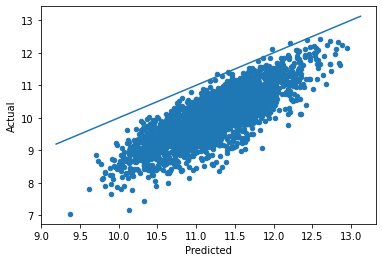

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result_young_mom.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

* Lol almost none of the dots are on the line
* Not a great predictor
* Bias for the predicted value to be less than the actual value
* But I mean... it gets the general increasing trend???

# [B] Nutritional Adequacy of Diet

* Requires FCT data to complete

Deliverable instructions: 
* Given the food actually consumed in your data, what can you say about the adequacy of the diets in the population you’re studying?
* What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

# [B] Engel's Law

* DOES the share of food in a household's budget fall within the overall size of the budget?
* Go over Consumer Food Demand lecture for help